In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zoo-animal-classification/class.csv
/kaggle/input/zoo-animal-classification/zoo.csv


**Problem Statement**

*Perform Agglomerative clustering with the appropriate MSE values*

Consider the dataset "zoo.csv", and look at the information provided in first five rows.

Find solutions of following questions:
1. Identify the unique number of high-level classes.
1. Perform Agglomerative clustering using 16 intermediate features
1. Compute the mean-squared error by comparing the actual high level class and predicted hig level class.

In [93]:
#import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances,confusion_matrix, mean_squared_error
import seaborn as sns

import warnings
# warnings.filter("ignore")


In [7]:
#read input file zoo.csv
Data= pd.read_csv("/kaggle/input/zoo-animal-classification/zoo.csv")

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


*There are 18 columns and 101 rows in this Dataset. There are no missing values in the Dataset*

In [10]:
Data.head(5)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [8]:
#Read file "class.csv"
DataClass= pd.read_csv("/kaggle/input/zoo-animal-classification/class.csv")

DataClass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Class_Number                       7 non-null      int64 
 1   Number_Of_Animal_Species_In_Class  7 non-null      int64 
 2   Class_Type                         7 non-null      object
 3   Animal_Names                       7 non-null      object
dtypes: int64(2), object(2)
memory usage: 352.0+ bytes


In [9]:
DataClass.head(5)

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


In [100]:
DataClass['Class_Type'].unique

**1) Identify the unique number of high-level classes from Zoo data**

In [60]:
#Identify the unique number of high-level classes from Zoo data
classNum=Data["class_type"].unique()
classNum.sort()
classNum

array([1, 2, 3, 4, 5, 6, 7])

<AxesSubplot:>

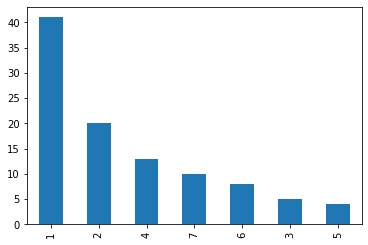

In [55]:
#count values for each class level type and show it through bar graph
Data["class_type"].value_counts()


fig,ax= plt.subplots()
(Data["class_type"].value_counts()).plot(ax=ax, kind="bar")

**2) Perform Agglomerative clustering using 16 intermediate features**

In [58]:
#features
features= Data.values[:,1:-1]
features.shape

(101, 16)

In [104]:
#labels
labels= Data["class_type"]
labels.shape

(101,)

In [66]:
#Intitializing Agglomerative clustering
Clusters= AgglomerativeClustering(n_clusters= 7, affinity= "cosine", linkage="average")

Clusters.fit(features)

AgglomerativeClustering(affinity='cosine', linkage='average', n_clusters=7)

In [130]:
pred= (Clusters.labels_)+1
np.unique(pred)


AttributeError: 'numpy.ndarray' object has no attribute 'unique'

<AxesSubplot:>

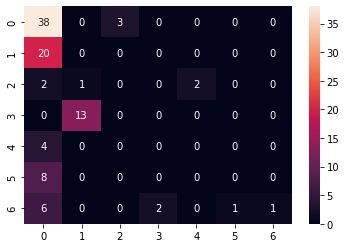

In [114]:
#plotting confusion matrix

cf= confusion_matrix(labels, pred)
sns.heatmap(cf, annot=True)

**3) Compute the mean-squared error by comparing the actual high level class and predicted hig level class.**

In [109]:
#calculate root Mean square error
MSE= mean_squared_error(labels,pred)
RMSE= np.sqrt(MSE)
print("Root Mean Squared Error is {}".format(RMSE.round(3)))

Root Mean Squared Error is 2.437
